<a href="https://colab.research.google.com/github/laway/tensorflow/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Networks in Tensor Flow

There are many definitions for a regression problem but in our case we're going to simplify it: prediction a numerical variable based on some other combination of variables, even shorteer: predicting a number

In [3]:
import tensorflow as tf
print("Tensorflow version: " + tf.__version__)

Tensorflow version: 2.14.0


## Creating some data to view and fit

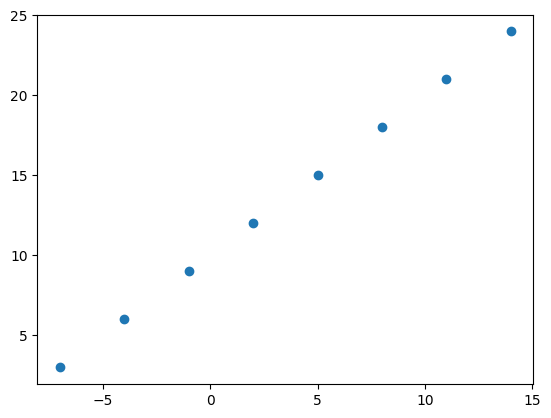

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

## Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [7]:
X[0].ndim

0

In [8]:
X[0], y[0]

(-7.0, 3.0)

In [18]:
# Turn our NumPy array into tensors with type float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

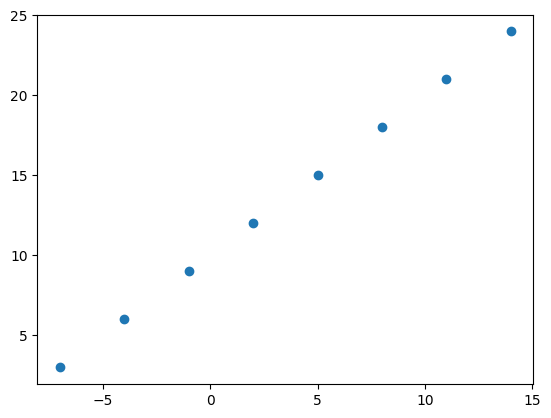

In [20]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1.   **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2.   **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [22]:
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short for stochastic gradial descent
              metrics = ["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)


Epoch 1/5
1/1 [==============================] - 0s 462ms/step - loss: 9.2907 - mae: 9.2907
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 9.1582 - mae: 9.1582
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 9.0257 - mae: 9.0257
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 8.8932 - mae: 8.8932
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 8.7607 - mae: 8.7607


In [23]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [37]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 150ms/step


array([[23.470192]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation functions of each layer.
2. **Compiling a model** - here we might change the optimization function or, perhaps, the **learning rate** of the optimization function
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on mode data (give the model more examples to learn from)

In [ ]:
# let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fitting a model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

In [43]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [50]:
model.predict([17.0])

1/1 [==============================] - 0s 121ms/step


array([[29.226974]], dtype=float32)

In [81]:
# recreating once again (with extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 1s 637ms/step - loss: 14.1552 - mae: 14.1552
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.4443 - mae: 13.4443
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.7365 - mae: 12.7365
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.0309 - mae: 12.0309
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3261 - mae: 11.3261
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.6195 - mae: 10.6195
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.9083 - mae: 9.9083
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 9.1898 - mae: 9.1898
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.4609 - mae: 8.4609
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.7192 - mae: 7.7192
Epoch 11/100
1/1 [==============================] - 0s 1

In [82]:
model.predict([17.0])

1/1 [==============================] - 0s 54ms/step


array([[26.721647]], dtype=float32)

## Evaluating a model